### Get dynamic stock representation Z_t

Build LSTM-DNN ( LSTM --> Dropout --> LSTM --> Dropout --> Dense ) network to learn the relationship between each stock feature and its percentage change.

Since we want to learn the relationship, here we concatenate all different stocks together, to get dynamic stock representation Z_t

638
638
000004.SZ 704
638
000006.SZ 688
000007.SZ 677
000008.SZ 675
638
000010.SZ 728
638
638
638
638
000017.SZ 729
000018.SZ 463
000019.SZ 662
638
638
000022.SZ 109
638
638
638
638
638
000029.SZ 39
638
000031.SZ 655
000032.SZ 719
000034.SZ 638
000035.SZ 599
638
000037.SZ 727
000038.SZ 606
000039.SZ 725
000040.SZ 715
000042.SZ 705
000043.SZ 464
638
000046.SZ 673
000048.SZ 680
638
638
638
000056.SZ 664
638
638
638
000061.SZ 720
000062.SZ 720
000063.SZ 691
638
638
638
638
638
638
000088.SZ 724
638
000090.SZ 725
638
638
000100.SZ 729
638
000151.SZ 728
638
000155.SZ 719
000156.SZ 606
638
000158.SZ 721
638
638
000301.SZ 716
000333.SZ 690
638
638
000401.SZ 711
638
000403.SZ 718
638
638
000408.SZ 704
000409.SZ 681
000410.SZ 725
638
000413.SZ 715
000415.SZ 611
638
638
000418.SZ 294
638
000420.SZ 722
638
000422.SZ 710
638
638
000426.SZ 681
638
638
638
638
000498.SZ 719
638
000502.SZ 706
000503.SZ 710
000504.SZ 719
000505.SZ 724
000506.SZ 647
000507.SZ 727
000509.SZ 651
638
000511.SZ 30
638
638


002531.SZ 725
002532.SZ 647
002533.SZ 719
638
002535.SZ 729
638
638
002538.SZ 705
638
638
638
002542.SZ 720
638
638
Epoch 1/10
65229/65229 [==============================] - 627s 10ms/step - loss: 0.0288 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 2/10
65229/65229 [==============================] - 620s 10ms/step - loss: 0.0153 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 3/10
65229/65229 [==============================] - 619s 9ms/step - loss: 0.0142 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 4/10
65229/65229 [==============================] - 613s 9ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - val_loss: 0.0445 - val_accuracy: 0.0000e+00
Epoch 5/10
65229/65229 [==============================] - 618s 9ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0913 - val_accuracy: 0.0000e+00
Epoch 6/10
65229/65229 [==============================] - 635s 10ms/step - loss: 0.0118 - accuracy: 0.

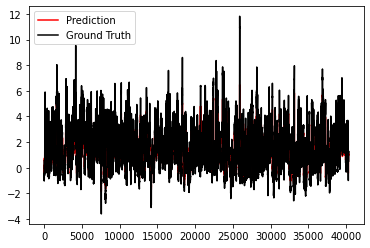

[[-0.18282229]
 [-0.12214461]
 [-0.15167996]
 ...
 [ 1.0397856 ]
 [ 1.0862967 ]
 [ 1.059985  ]]


In [6]:
run multi_stock_split_concat.py

Mean Square Error for training set and test set are 0.21, 0.32, respectively.

#### We save the model for future use

In [7]:
dense1_layer_model.save('model/m_0808.h5')

### Exploring Stock Intrinsic Properties

Before this step, we've got stock intrinsic properties Q, Top K_r stocks at time t,

We would like to make use of Dynamic Market State $S_t=\frac{1}{K_r}\sum_{i=1}^{i=K_r}Q^i$ (represent market's current preference on various stock properties) to predict the stock ranking at time t+1

$D_t^j=S_tQ^j$

$\hat r^j_{t+1} = MLP([Z_t^j,\hat D_t^j])$, we assume $D^j_t\approx D^j_{t-1}$ 

We concatenate several stocks together for training, instead of partial fit all several stocks step by step


  0%|          | 0/15 [00:00<?, ?it/s]

0


  7%|▋         | 1/15 [00:33<07:44, 33.21s/it]

1


 13%|█▎        | 2/15 [01:05<07:03, 32.61s/it]

2


 20%|██        | 3/15 [01:36<06:20, 31.74s/it]

3


 27%|██▋       | 4/15 [02:07<05:49, 31.75s/it]

4


 33%|███▎      | 5/15 [02:38<05:12, 31.24s/it]

5


 40%|████      | 6/15 [03:08<04:37, 30.82s/it]

6


 47%|████▋     | 7/15 [03:38<04:04, 30.54s/it]

7


 53%|█████▎    | 8/15 [04:10<03:37, 31.10s/it]

8


 60%|██████    | 9/15 [04:42<03:08, 31.38s/it]

9


 67%|██████▋   | 10/15 [05:14<02:38, 31.67s/it]

10


 73%|███████▎  | 11/15 [05:46<02:07, 31.82s/it]

11


 80%|████████  | 12/15 [06:19<01:36, 32.02s/it]

12


 87%|████████▋ | 13/15 [06:51<01:04, 32.06s/it]

13


 93%|█████████▎| 14/15 [07:23<00:32, 32.08s/it]

14


100%|██████████| 15/15 [07:43<00:00, 30.93s/it]


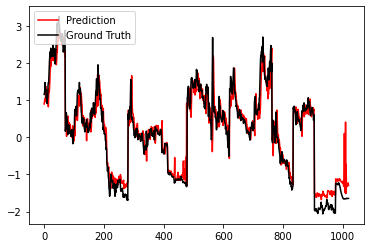

In [1]:
run Predict_stock_ranking.py

### Future Work

##### 1. Use more recent data to evaluate this pipeline's performance

##### 2. Think of our contribution

    i)  Try some different network structures
    ii) Take more information into consideration, try to do some work about multi-fusion